<a href="https://colab.research.google.com/github/kcy919/ml_edu/blob/master/0819_ml_iris_sample_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


## 1. 개요
##(1) 패키지 불러오기 
##(2) 데이터 불러오기 
- sklearn 패키지 내장 데이터 있음 

from sklearn.datasets imoort load_iris 
iris = load_iris()
print iris()


1.   
2.   항목 추가



In [12]:
from sklearn.datasets import load_iris 
iris = load_iris()    # Bunch 형태의 데이터셋으로 구성되어 있음 

## 독립변수 구성된 데이터 
iris_data = iris.data

## 종속변수 
iris_label = iris.target
print('iris target값:', iris_label[[0,50,100]])
print('iris target명:', iris.target_names)


iris target값: [0 1 2]
iris target명: ['setosa' 'versicolor' 'virginica']


## (2) 데이터 전처리
- 상황 : Numpy 형태, 리스트
- 방법 : pandas를 활용하여, 데이터 프레임 만들기 



import pandas as pd
import numpy as np

iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)
iris_df['label'] = iris.target
print(iris_df.head(3).to_markdown())

In [17]:
import pandas as pd
import numpy as np

iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)
iris_df['label'] = iris.target
print(iris_df.head(3).to_markdown())

|    |   sepal length (cm) |   sepal width (cm) |   petal length (cm) |   petal width (cm) |   label |
|---:|--------------------:|-------------------:|--------------------:|-------------------:|--------:|
|  0 |                 5.1 |                3.5 |                 1.4 |                0.2 |       0 |
|  1 |                 4.9 |                3   |                 1.4 |                0.2 |       0 |
|  2 |                 4.7 |                3.2 |                 1.3 |                0.2 |       0 |


In [13]:
## How to convert a Scikit-learn dataset to a Pandas dataset?
##일반적인 함수 함수를 만든것임. 

from sklearn import datasets
import pandas as pd
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

df_iris = sklearn_to_df(load_iris())
df_iris 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## (4)데이터 시각화

In [18]:
temp_data = df_iris.copy()
# print(temp_data.info())


In [ ]:
# column 명 방꾸기
temp_data.columns = ["sepal_length", "sepal_width", "petal_length", "petal width"]

In [19]:
# map
# 0 - > 'set
temp_data = iris_df.copy()

replace_fct = {0:'setosa', 1: 'versicolor', 2: "virginica"}
temp_data.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width","species"]
temp_data['species'] = temp_data['species'].map(replace_fct)
temp_data.head(3).to_markdown()

'|    |   sepal_length |   sepal_width |   petal_length |   petal_width | species   |\n|---:|---------------:|--------------:|---------------:|--------------:|:----------|\n|  0 |            5.1 |           3.5 |            1.4 |           0.2 | setosa    |\n|  1 |            4.9 |           3   |            1.4 |           0.2 | setosa    |\n|  2 |            4.7 |           3.2 |            1.3 |           0.2 | setosa    |'

In [20]:
import matplotlib.pyplot as plt

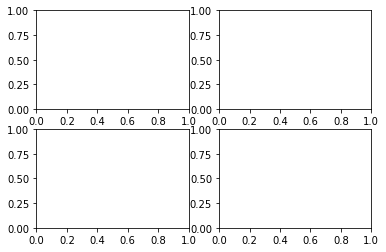

In [21]:
n_bins =10      ## x 축의 구간개수를 bin 이라고 한다. 
fig, axs = plt.subplots(2,2)

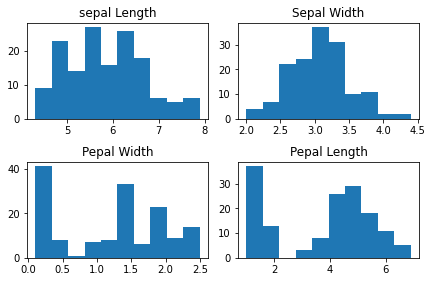

In [22]:
n_bins =10
fig, axs = plt.subplots(2,2)
axs[0,0].hist(temp_data['sepal_length'], bins = n_bins);
axs[0,0].set_title('sepal Length');
axs[0,1].hist(temp_data['sepal_width'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[1, 0].hist(temp_data['petal_width'], bins = n_bins);
axs[1, 0].set_title('Pepal Width');
axs[1, 1].hist(temp_data['petal_length'], bins = n_bins);
axs[1, 1].set_title('Pepal Length');

fig.tight_layout(pad=1.0);

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


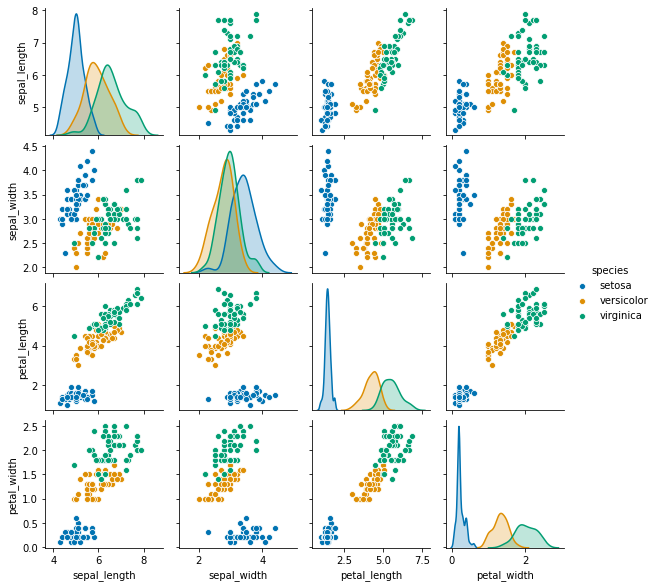

In [23]:
import seaborn as sns
sns.pairplot(temp_data, hue="species", height = 2, palette = 'colorblind');

# (5) 데이터셋 분리 

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_data, # 독립변수 
                                                    iris_label, # 종속변수 
                                                    test_size = 0.2, 
                                                    random_state = 1)

- array
- test_size , 비율 
- random_state는 실험의 재현성을 위한 코드 . 여기서 숫자 1은 그냥 쓴거임 아무거나. 

### (6) 머신러닝 모형 학습 

In [25]:
from sklearn.tree import DecisionTreeClassifier

# 객체 생성 
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행
dt_clf.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

- 수치형 데이터, 히스토그램 & 박스플롯 & 산점도 

## (7) 모형 테스트 

In [26]:
from sklearn.metrics import accuracy_score
pred = dt_clf.predict(X_test) ##예측 
print('The accuracy of the Decision Tree is: {:.3f}'.format(accuracy_score(pred,y_test)))


The accuracy of the Decision Tree is: 0.967


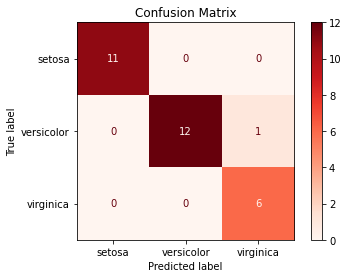

In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import plot_confusion_matrix

labels = ['setosa', 'versicolor', 'virginica']
disp = plot_confusion_matrix(dt_clf, 
                             X_test, y_test, 
                             display_labels=labels, 
                             cmap=plt.cm.Reds, 
                             normalize=None)
disp.ax_.set_title('Confusion Matrix');


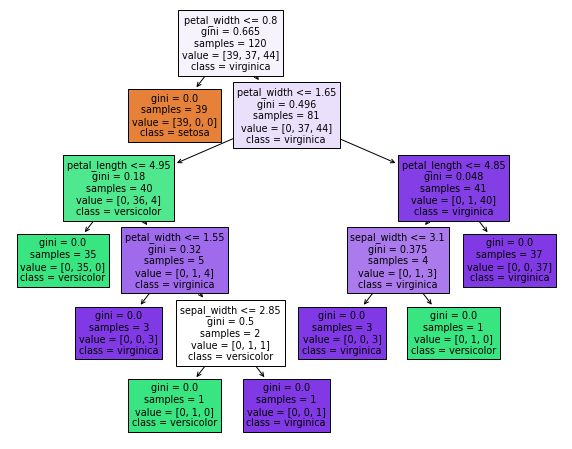

In [28]:
import matplotlib.pyplot as plt

explt_vars = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
fct_val = {0: 'setosa', 1: 'versicolor', 2: "virginica"}

plt.figure(figsize = (10,8))
plot_tree(dt_clf, feature_names = explt_vars, class_names = fct_val, filled = True);

In [ ]:
## 예측 모형 , 의사결정 모형 
## 예측모형을 구할 때 반드시 오차가 생기기 마련이다. 
## 데이터 셋 이 100개 인데 가지를 어떻게 쳐야 할지 ?? , 변수가 너무 많다. 
## 가지를 어떻게 쳐야 할지는 정해진게아니라 그때그때 다르다..
## none 으로 안해놓으면 알아서 최대 최소로 

## 머신러닝은 연산속도랑 성능향상 
## 뿌리를 내리는것은 좋지않다,,,
## 제어를 해줘야됨. 

In [ ]:
## 불순도 : 순수하냐 순수하지않냐 
지니계수가 높냐 낮냐 
## 뿌리를 많이 내리면 내릴수록 불순도가 낮아진다.. 


In [30]:
gini = 1 - (0/40)**2 - (36/40)**2 - (4/40)**2


In [31]:
print('The value of Gini is: {:.3f}'.format(gini))

The value of Gini is: 0.180


Text(4.05, 0.5, '(Depth=2)')

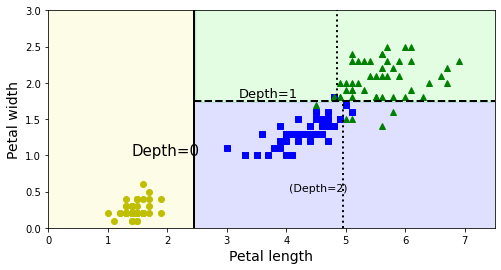

In [32]:
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import numpy as np

iris = load_iris()
X = iris.data[:, 2:] # 꽃잎 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

In [37]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)